![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<div class="alert alert-block alert-info">

* **Titel:** R-Kenntnis Lösung Übungen 08: Zeitreihenanalyse mit R
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 04.12.2021 (Version 1.0)

</div>

# BI - R-Kenntnis Lösung Übungen 08: Zeitreihenanalyse mit R

<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse`)
* Datensatz laden (siehe *Data/marketing.csv*)

</div>

In [17]:
# Laden der notwendigen Libraries
library(tidyverse)
library(ggplot2)
library(forecast)
library(lubridate)
library(ggfortify)

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



# Übungsaufgaben: Analyse von Passagierdaten

## Datensatz und Aufgabe
Der Datensatz `AirPassengers` enthält die Daten für eine Fluggesellschaft und deren monatliches Passagieraufkommen für den Zeitraum von 1949 - 1960.

In [2]:
data("AirPassengers")
# Ausgabe der Daten in einer druckfähigen Tabelle 
# mittels pander()
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")
***Folgende Aufgaben:***


* Analysieren Sie die Daten und erstellen Sie eine Zeitreihenanalyse.
* Leiten Sie ein adäquates ARIMA Modell ab.
* Erstellen Sie mit Ihrem Modell eine Prognose für die Jahre 1961 - 1965.

Siehe auch folgende Links:

* <http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html>
* <https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials>
* <https://blog.exxcellent.de/datenanalyse-mit-r-so-erstellen-sie-interaktive-prognoseplots>

## Laden der Daten

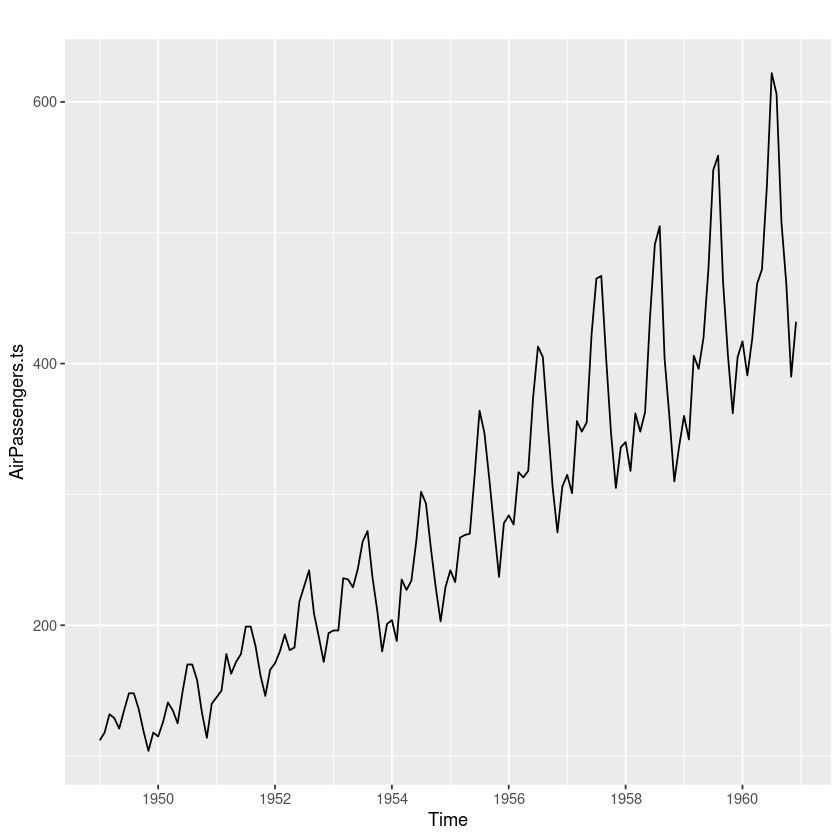

In [3]:
# Laden des Datensatzes
AirPassengers.ts <- AirPassengers
autoplot(AirPassengers.ts)

## Differencing: Identifikation von Trend- und Saison-Aspekten
Im ersten Schritt geht es nun darum, wie viele Differencing Schritte notwendig sind.

Wir wollen eine Zeitreihe, die nach dem Differencing keine Trend- oder Saison-Aspekte enthält.

In [4]:
# Trend Differencing --> d=1
AirPassengers.ts.diff_trend <-diff(AirPassengers.ts)
# Saison Differencing d=0/D=1
AirPassengers.ts.diff_saison <- diff(AirPassengers.ts, lag = 12)
# Trend und Saison Differencing kombiniert--> d=1 / D=1
AirPassengers.ts.diff_trendsaison <- diff(diff(AirPassengers.ts, lag = 12))

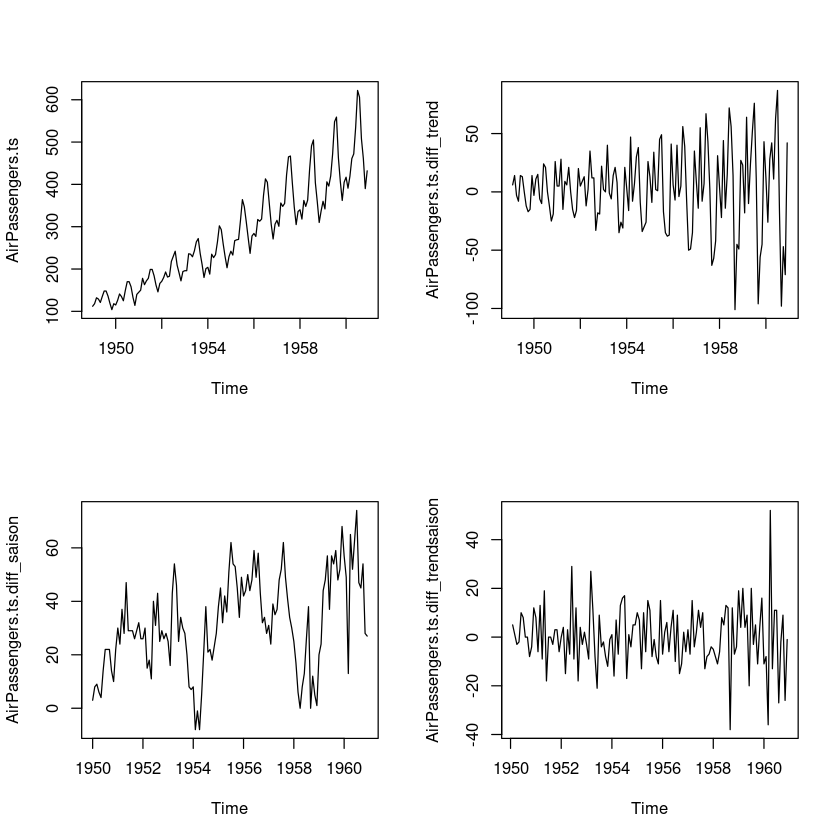

In [5]:
par(mfrow = c(2, 2))
# Plot der Zeitreihe
plot(AirPassengers.ts)
# Plot mit Differencing des Trends
plot(AirPassengers.ts.diff_trend)
# Plot mit Differencing der Saison (12)
plot(AirPassengers.ts.diff_saison)
# Kombiniertes Differencing (Trend & Saison)
plot(AirPassengers.ts.diff_trendsaison)

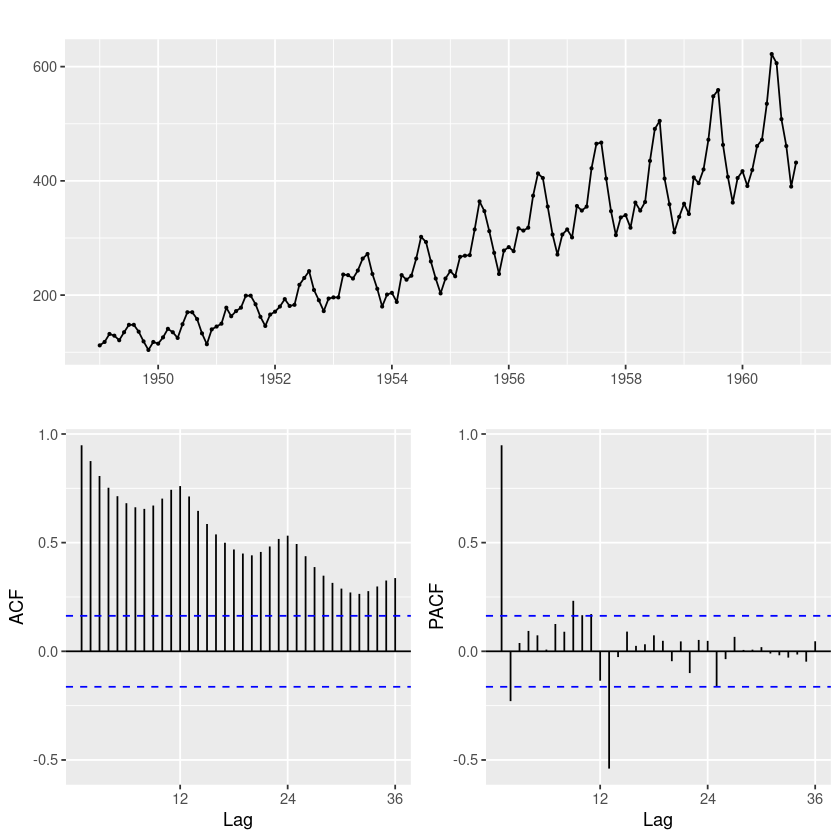

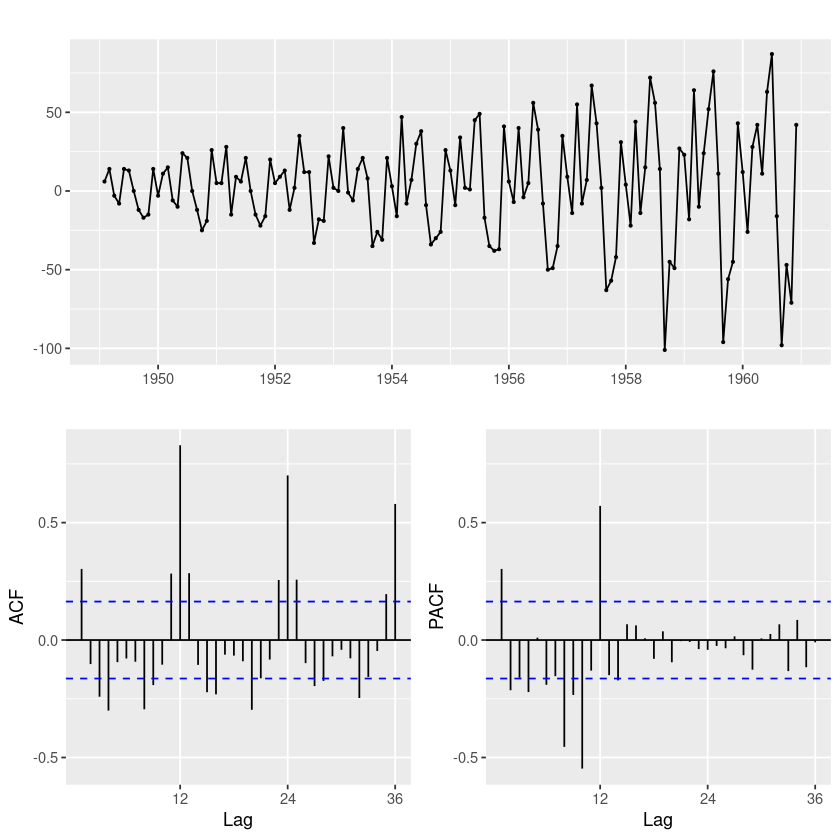

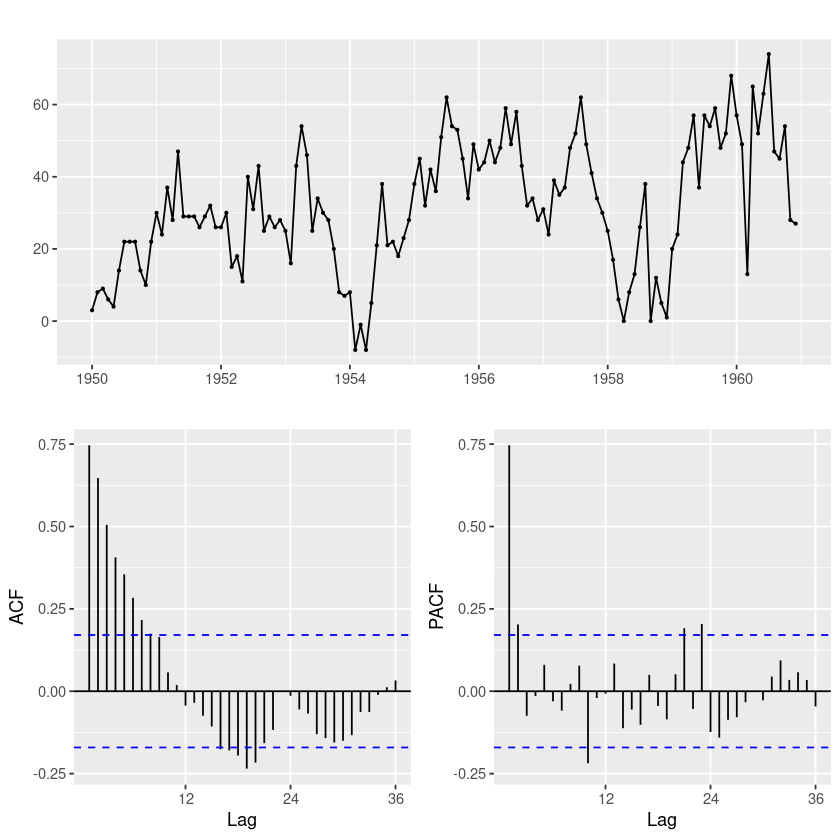

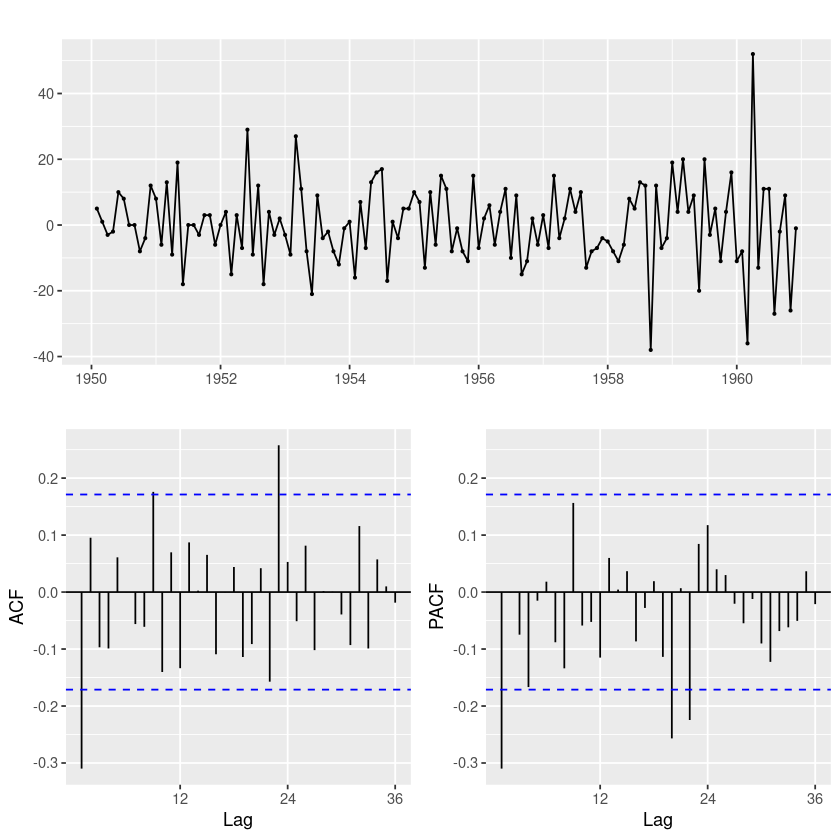

In [6]:
# mit ggtsdisplay()
ggtsdisplay(AirPassengers.ts)
ggtsdisplay(AirPassengers.ts.diff_trend)
ggtsdisplay(AirPassengers.ts.diff_saison)
ggtsdisplay(AirPassengers.ts.diff_trendsaison)

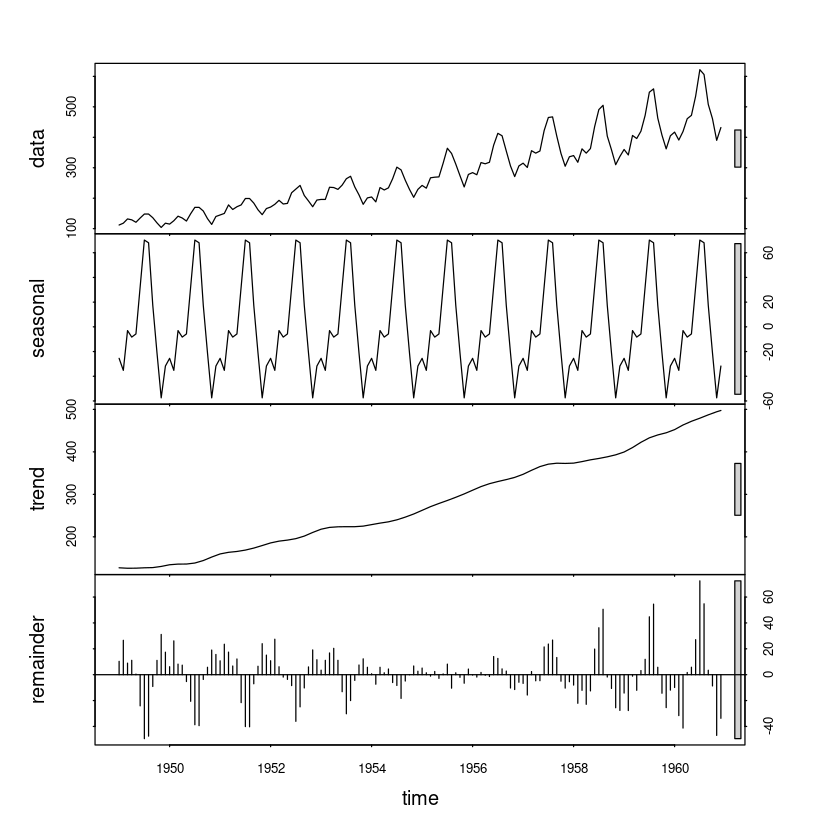

In [7]:
AirPassengers.ts.stl <- stl(AirPassengers.ts, "per")
plot(AirPassengers.ts.stl)

## Konfiguration des Modells

In [13]:
AirPassengers.fit.auto <- auto.arima(AirPassengers.ts, 
                                    trace = TRUE, 
                                    seasonal = TRUE, 
                                    ic = "aicc")

summary(AirPassengers.fit.auto)


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 1031.539
 ARIMA(1,1,0)(1,1,0)[12]                    : 1020.582
 ARIMA(0,1,1)(0,1,1)[12]                    : 1021.192
 ARIMA(1,1,0)(0,1,0)[12]                    : 1020.488
 ARIMA(1,1,0)(0,1,1)[12]                    : 1021.103
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(2,1,0)(0,1,0)[12]                    : 1022.583
 ARIMA(1,1,1)(0,1,0)[12]                    : 1022.583
 ARIMA(0,1,1)(0,1,0)[12]                    : 1020.733
 ARIMA(2,1,1)(0,1,0)[12]                    : 1018.165
 ARIMA(2,1,1)(1,1,0)[12]                    : 1018.395
 ARIMA(2,1,1)(0,1,1)[12]                    : 1018.84
 ARIMA(2,1,1)(1,1,1)[12]                    : Inf
 ARIMA(3,1,1)(0,1,0)[12]                    : 1019.565
 ARIMA(2,1,2)(0,1,0)[12]                    : 1019.771
 ARIMA(1,1,2)(0,1,0)[12]                    : 1024.478
 ARIMA(3,1,0)(0,1,0)[12]                    : 1023.984
 ARIMA(3,1,2)(0,1,0)[12] 

Series: AirPassengers.ts 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

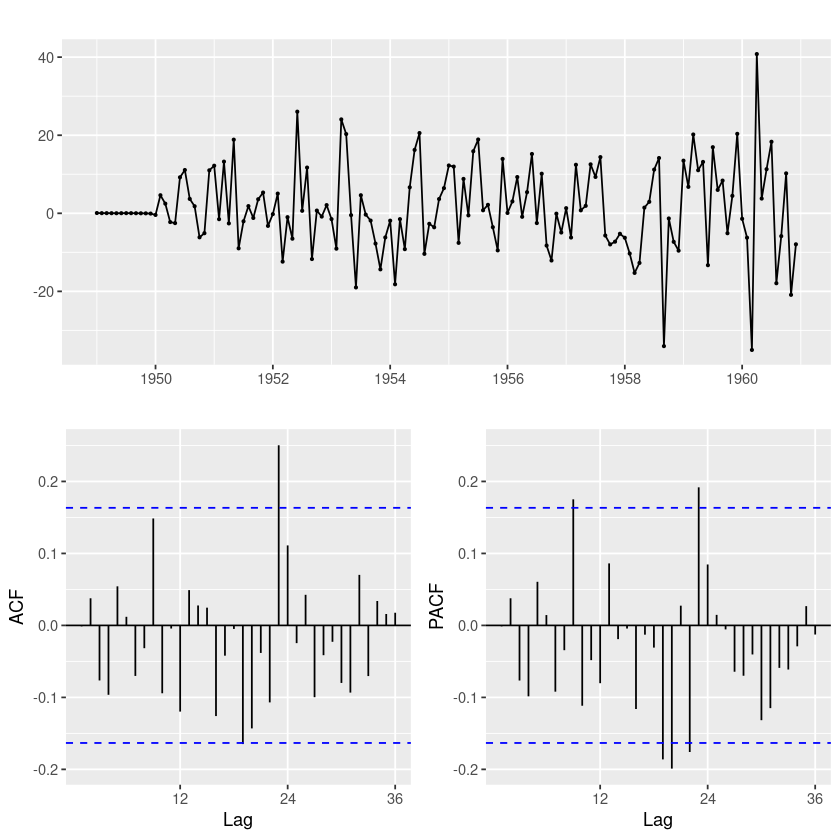

In [14]:
AirPassengers.fit.auto %>% 
  residuals() %>% 
  ggtsdisplay()

## Überprüfung des Modells

Für die Analyse des Modells nutzen wir die ```ggtsdiag()``` Funktion aus der ```ggfortify``` Bibliothek.

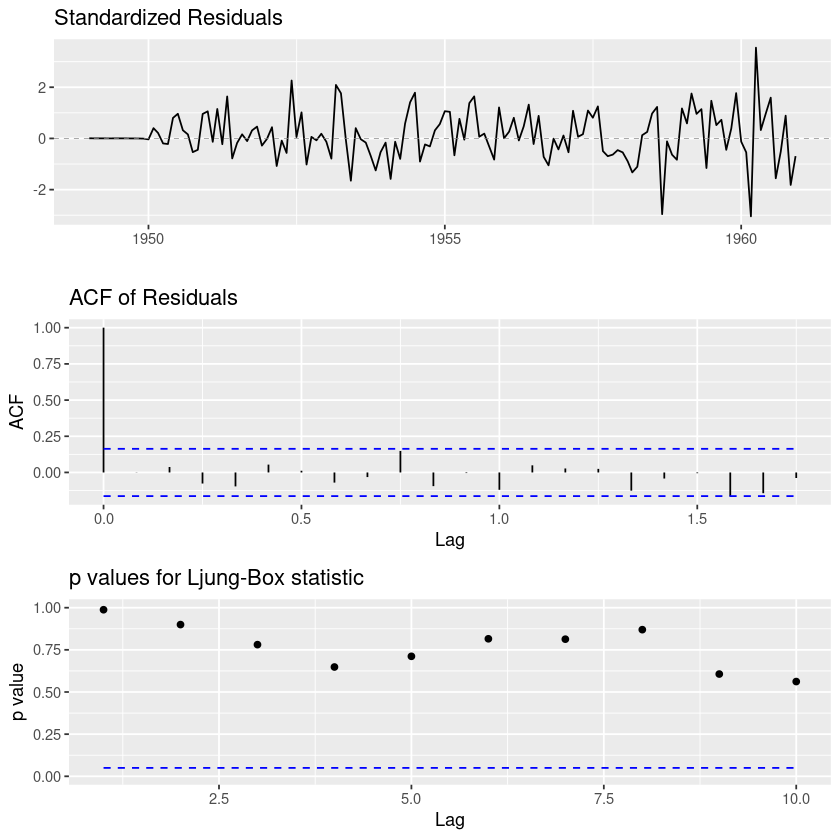

In [18]:
ggtsdiag(AirPassengers.fit.auto)

Basierend auf den Ausgaben von ```ggtsdiag()``` kann man davon ausgehen, dass das resultierende Modell eine relativ hohe Güte besitzt. Speziell die AUsgaben des Ljung-Box Test deuten darauf hin (p-Werte > 0,05).

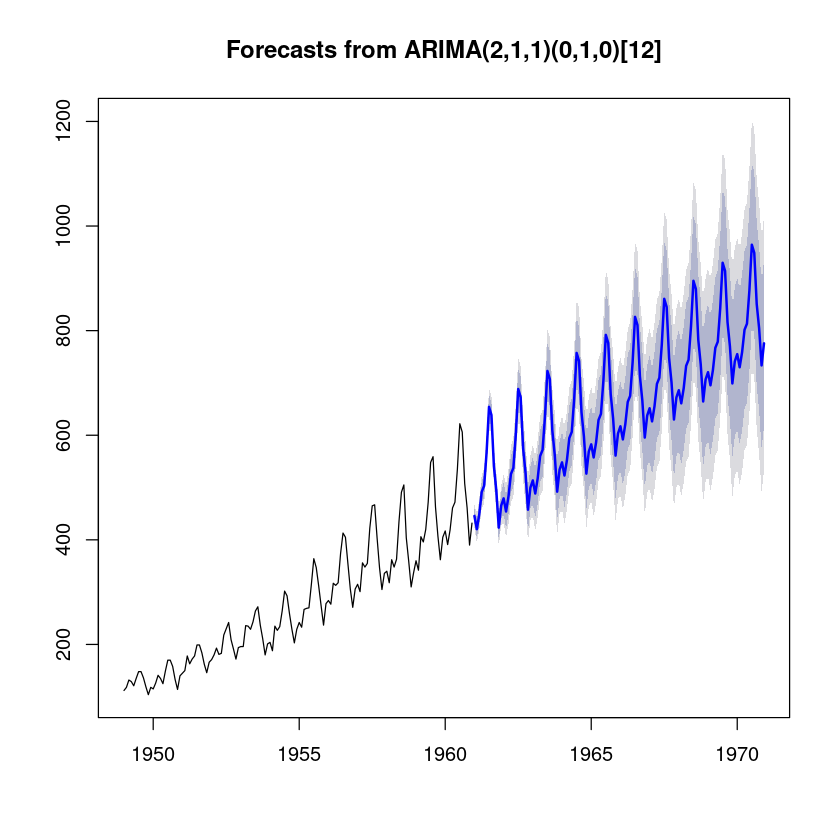

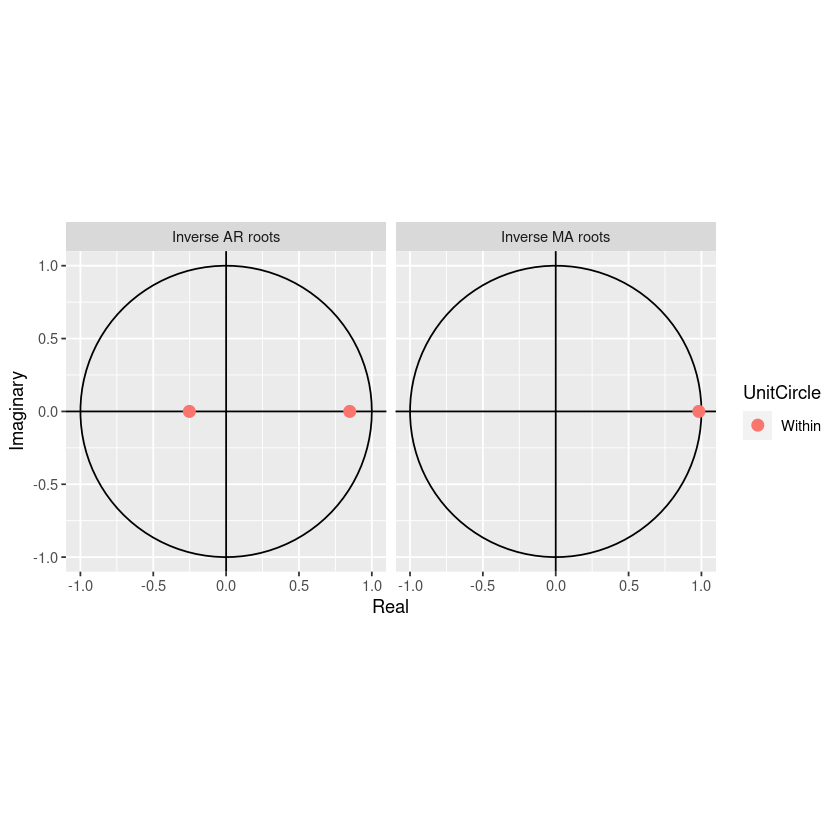

In [11]:
AirPassengers.yr_forecast2 <- forecast(AirPassengers.fit.auto, h = 10*12)
# AirPassengers.yr_forecast2
plot(AirPassengers.yr_forecast2)
autoplot(AirPassengers.fit.auto)

In [ ]:
Box.test(bike.ts, type="Ljung-Box")

## Vergleich des Modells und der Vorhersage mittels Testdaten

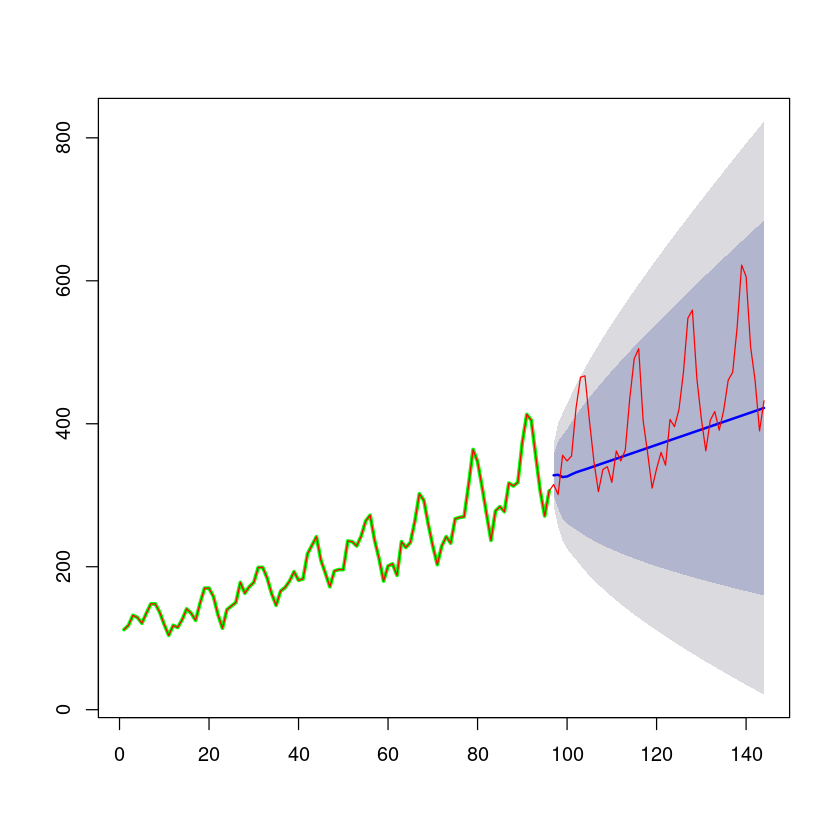

In [12]:
# Check des Modells
hold <- window(ts(AirPassengers.ts), start=97)

fit_no_holdout = arima(ts(AirPassengers.ts[-c(97:144)]), order=c(2,1,1), seasonal = c(0,1,0))

fcast_no_holdout <- forecast(fit_no_holdout,h=48)
plot(fcast_no_holdout, main=" ", col="green",lwd=3)
lines(ts(AirPassengers.ts),col="red")